## Data Analysis using Pandas

For this analysis, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this analysis can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

The objective is to analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

In [38]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
%matplotlib inline

To examine what categories of passengers were most likely to survive, we will perform the analysis as follows:
- Examine how the data set looks
- Check each attribute one by one and investigate it's impact on the data
- Fill the missing value
- Create categories and new attributes
- Visualize data after data cleaning

In [39]:
# Loading the data into the Pandas dataframe
titanic_data = pd.read_csv('train.csv')
titanic_data.head() # Looking at first few rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
# Getting description of the data attributes
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that there are 891 records in the dataset. The columns `Age` and `Cabin` are missing a significant number of records, and `Embarked` is missing 2 records. There are attributes which represent numerical data, such as `Survived`, `Pclass` or `Fare`. Some attributes are categorical, such as `Name`, `Sex`, `Ticket`.

In [41]:
# Check attributes with missing values
for attribute in [titanic_data]:
    print (pd.isnull(attribute).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [42]:
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_sort = (round(percent, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_sort], axis=1, keys=['Missing Total', '%'])
missing_data.head()

,Missing Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


1. The attribute `Age` is missing 177 values, which is a significant number of missing records.
2. `Cabin` is missing 77% of the data, 687 records. This is also a very significant number.
3. `Embarked` is missing 2 records.

We will need to figure out how to impute the missing values later in the analysis.

In [43]:
titanic_data.describe(include='all') 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Pears, Mr. Thomas Clinton",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Using the descriptive statistics table above and general knowledge about the events that led to the Titanic disaster, we will review all attributes and decide what attributes we will use in the analysis and what attributes we can drop for now. 

In [44]:
# Check each attribute one by one and investigate it's impact on the data
titanic_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

The dataset consists of 12 attributes, where `Survival` is the target attribute. We can check each attribute one by one to investigate it's impact on survival rate.<br>
1. `PassengerId` is a nominal attribute and has no effect on the target attribute. We can remove this attribute from the analysis and the dataframe
2. `Survived` is the target attribute
3. `Pclass` is a numeric attribute and it does not contain missing values

In [45]:
# Impact of Pclass attribute on survival rate
print (titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


>We can see that passenger in first class (`Pclass` = 1) has the highest survival rate (62.96%)


4. `Sex` is a catergorical attributes having no missing values

In [46]:
# Impact of Sex attribute on survival rate
print (titanic_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


> Females have better chance of surviving than males.

Overall, females are more likely to survive the Titanic disaster. In addition to that, first-class passenger has the highest chances of surviving.

5. `SibSp` is a numerical attribute represents the number of siblings/spouse aboard the Titanic.
6. `Parch` is also numerical attribute represents the number of children/parents aboard the Titanic.

In [47]:
# Impact of SibSp attribute on survival rate
print (titanic_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [48]:
# Impact of Parch attribute on survival rate
print (titanic_data[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


> Based on the impact of `SibSp` and `Parch`, we can create a new attribute called `FamilySize` and check how having 
family memebers on this ship affects survival rate.

In [49]:
# Impact of FamilySize attribute on survival rate
titanic_data['FamilySize'] = titanic_data.SibSp + titanic_data.Parch + 1
family = titanic_data.groupby('FamilySize')['Survived'].agg(['sum', 'mean']).reset_index()
family

,FamilySize,sum,mean
0,1,163,0.303538
1,2,89,0.552795
2,3,59,0.578431
3,4,21,0.724138
4,5,3,0.200000
5,6,3,0.136364
6,7,4,0.333333
7,8,0,0.000000
8,11,0,0.000000


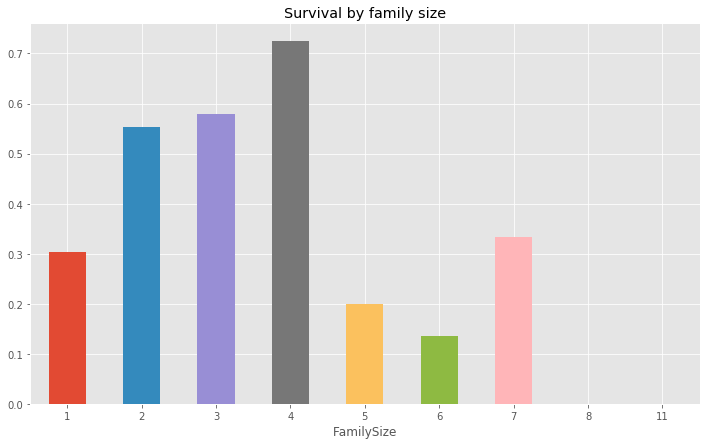

In [50]:
family.plot(x='FamilySize', y='mean', kind='bar', legend=False, 
                          rot=0, figsize=(12, 7), title = 'Survival by family size');

> We can see that passengers with small families (2-4 members) had the highest chance of survival:
- 55% for families of 2 people
- 57.8% for families of 3
- and 72.4% for families of 4,

> The solo travelers only had 30% survival rate. The survival rate drops significantly for families with more than 4 members.

7. `Embarked` has 2 missing values, we can fill them with the most common one.

In [51]:
# Fill missing embarked value with mode
titanic_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [52]:
for dataset in [titanic_data]:
    common_value = 'S'
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
# Impact of Embarked attribute on survival rate
print (titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())    

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


> Most passengers who embarked at the Cherbourg port survived.

8. `Fare` is a numberic attribute and we can categorize `Fare` into 4 groups for analysis

In [53]:
# Impact of Fare attribute on survival rate
titanic_data['FareGroup'] = pd.qcut(titanic_data['Fare'], 4)
print (titanic_data[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index = False).mean())

         FareGroup  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


> Passengers who paid a higher fare (i.e. first class) were more likely to survive.

9. `Age` is a numeric attribute with missing values. To fill the missing values, we can create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation.

In [54]:
# Filling missing age values
for dataset in [titanic_data]:
    mean = titanic_data['Age'].mean()
    std = titanic_data['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    filled_age = dataset['Age'].copy()
    filled_age[np.isnan(filled_age)] = rand_age
    dataset['Age'] = filled_age
    dataset['Age'] = titanic_data['Age'].astype(int)

In [55]:
# Modify Age into Age Groups
def age_group(age):
    if age < 15:
        return '0 - 14 (Children)'
    if age < 25:
        return '15 - 24 (Youth)'
    if age < 65:
        return '25 - 64 (Adults)'
    elif not math.isnan(age):
        return '65+ (Seniors)'

titanic_data['AgeGroup'] = titanic_data['Age'].apply(age_group)   
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FareGroup,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,"(-0.001, 7.91]",15 - 24 (Youth)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]",25 - 64 (Adults)
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",25 - 64 (Adults)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2,"(31.0, 512.329]",25 - 64 (Adults)
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,"(7.91, 14.454]",25 - 64 (Adults)


In [56]:
# Impact of AgeGroup attribute on survival rate
print (titanic_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index = False).mean())

            AgeGroup  Survived
0  0 - 14 (Children)  0.576923
1    15 - 24 (Youth)  0.347985
2   25 - 64 (Adults)  0.379962
3      65+ (Seniors)  0.090909


10. `Name` is unique but it has `Title` which can have impact on target attribute

In [57]:
# Creating a new attribute Title from Name
for dataset in [titanic_data]:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [58]:
# Impact of Title attribute on survival rate
print (titanic_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


11. `Cabin` has many missing values but we can create a new attribute `Deck` by extracting the letter from cabin number as it refers to the deck of the titanic, ranging from A to G.

In [59]:
# Converting cabin number into Deck
for dataset in [titanic_data]:
    # fill empty Cabin with 'Unknown'
    dataset['Cabin'] = dataset['Cabin'].fillna('Unknown')
    dataset['Deck'] = dataset.Cabin.str.extract('([a-zA-Z]+)', expand=False)

In [60]:
# Impact of Deck attribute on survival rate
print (titanic_data[['Deck', 'Survived']].groupby(['Deck'], as_index = False).mean())

      Deck  Survived
0        A  0.466667
1        B  0.744681
2        C  0.593220
3        D  0.757576
4        E  0.750000
5        F  0.615385
6        G  0.500000
7        T  0.000000
8  Unknown  0.299854


12. `Ticket` attribute has 681 unique tickets, and cannot be mapped into useful categories.

As shown above, five new attributes are created. `NotAlone` is a categorical attribute, which equals 0 if the passenger is alone (i.e. adding `SibSp` and `Parch` equals 0), and is 1 otherwise. `AgeGroup` and `FareGroup` are categorized into four groups from the attributes `Age` and `Fare` respectively. While `Title` and `Deck` are extracted from `Name` and `Cabin` respectively.


From the analysis, we can exclude the following three attributes:

- `PassengerId` will not affect the survival rate if we reassign ids
- `Ticket` has too many unique values (681 unique values out of 891)
- `Cabin` is highly incomplete (77% of it are missing)

Two attributes with missing values, that are included in the analysis, are `Age` and `Embarked`. For handling missing `Age` values, We used random numbers, which are computed based on the mean age value and standard deviation. The missing `Embarked` values are replaced with the most occured value since `Embarked` is a categorical attribute. Both methods aim to diminish any correlations involving the attributes that are imputed.

In [61]:
# Create new dataset without unwanted columns
new_titanic_data = titanic_data.drop(labels=['PassengerId', 'Ticket', 'Cabin'], axis=1) 
new_titanic_data.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,FareGroup,AgeGroup,Title,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,2,"(-0.001, 7.91]",15 - 24 (Youth),Mr,Unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,2,"(31.0, 512.329]",25 - 64 (Adults),Mrs,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,1,"(7.91, 14.454]",25 - 64 (Adults),Miss,Unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,2,"(31.0, 512.329]",25 - 64 (Adults),Mrs,C
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,1,"(7.91, 14.454]",25 - 64 (Adults),Mr,Unknown


In [62]:
new_titanic_data.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
FareGroup     891 non-null category
AgeGroup      891 non-null object
Title         891 non-null object
Deck          891 non-null object
dtypes: category(1), float64(1), int32(1), int64(5), object(6)
memory usage: 88.0+ KB


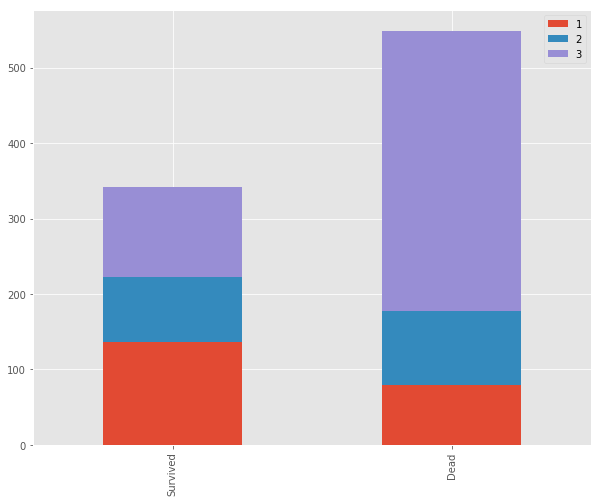

In [63]:
# Visualize data after data cleaning
# The relation between which class a passenger is in and how it affected their chance of survival.
pclass_survived = new_titanic_data[new_titanic_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = new_titanic_data[new_titanic_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived, pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

We can clearly see that the passengers from first and second class had higher survival rate than those from third class.

In [64]:
# Calculating percentages:
Survivors_Class = pd.crosstab(titanic_data['Survived'],titanic_data['Pclass'],margins=True)
(Survivors_Class/Survivors_Class.loc['All']*100).round(2)

Pclass,1,2,3,All
Survived,,,,
0,37.04,52.72,75.76,61.62
1,62.96,47.28,24.24,38.38
All,100.00,100.00,100.00,100.00


Survival based on the class the passenger traveled in:
- Class 1 - 63%
- Class 2 - 47.3%
- Class 3 - 24.2%

In [65]:
# Combining gender and class
Gender_Class = pd.crosstab(index = titanic_data["Survived"], columns=[titanic_data["Pclass"], titanic_data["Sex"]])
Gender_Class

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

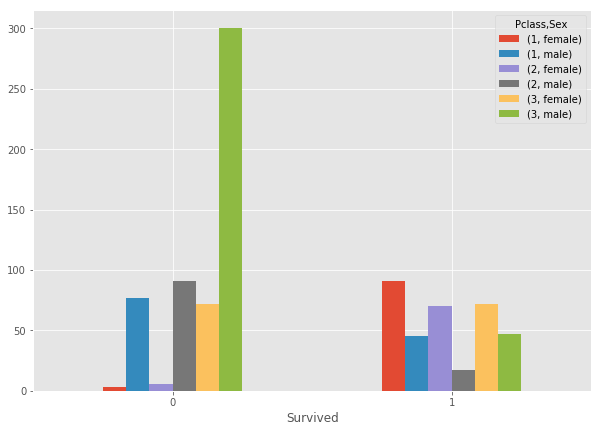

In [66]:
# Quick visualization of the table above
Gender_Class.plot(kind='bar', stacked=False, rot = 0, figsize=(10, 7));

In [67]:
# Transforming absolute numbers into percentages
Gender_Class_per = pd.crosstab(index = titanic_data["Survived"], columns=[titanic_data["Pclass"], titanic_data["Sex"]], normalize='columns')*100
(Gender_Class_per).round(2)

Pclass        1             2             3       
Sex      female   male female   male female   male
Survived                                          
0          3.19  63.11   7.89  84.26   50.0  86.46
1         96.81  36.89  92.11  15.74   50.0  13.54

- Almost all female passengers in the First and Second Classes survived with 96.8% and 92.1% correspondingly
- Female passengers in the Third Class had 50% chances of survival
- Even though the male passengers had better chances of survival if they were in First Class cabin, 36.9% vs to 15.7% and 13.5% in the Second and Third Classes, they still had much lower chances of survival compared to female passengers.
- The lowest survival percentage was among male passengers in the Third Class cabin, only 13.5% survived.

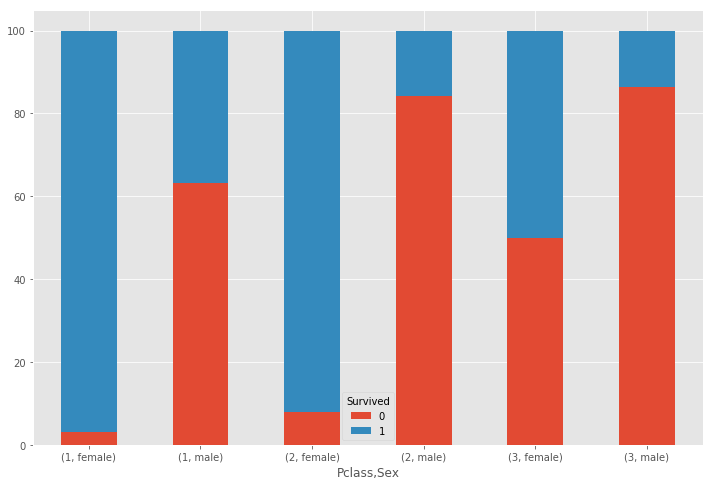

In [68]:
# The survival percentages, side by side, for all Class/Sex combinations
Gender_Class_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12, 8));

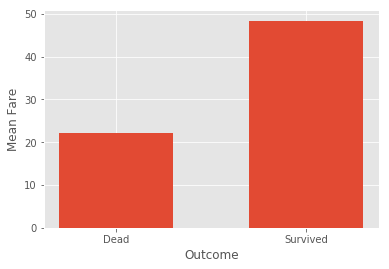

In [69]:
# The relation between ticket fare a passenger paid and how it affected their chance of survival.
dead = new_titanic_data[new_titanic_data['Survived'] == 0]['Fare'].mean()
survived = new_titanic_data[new_titanic_data['Survived'] == 1]['Fare'].mean()
xs  = [dead, survived]
ys = ['Dead','Survived']
plt.bar(ys, xs, 0.6, align='center')
plt.xlabel('Outcome')
plt.ylabel('Mean Fare')
plt.show()

We can observe that higher fare paying passengers have better chance of survival.

The following attributes are used for the analysis as we have discussed above.

In [70]:
new_titanic_data.columns.values # 14 attributes

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'FamilySize', 'FareGroup', 'AgeGroup', 'Title',
       'Deck'], dtype=object)

### Summary of findings

The following categories of passengers were most likely to survive Titanic disaster:
- Women traveling First and Second Class had more than 90% survival rate. Even though female passengers in the Third Class had only 50% chance to survive, much lower compared to the ladies in the higher class of the cabin, they still had much higher chance to survive than male passengers in the Third Class who had only 13.5% survival rate.
- Passengers in the First Class had much higher survival rate compared to passengers in the Second and Third Classes
- Children of 14 years old and younger had 57.7% survival rate, which is pretty high compared to any other age group
- Passengers who traveled with the family of 2 to 4 family members. Larger families and solo travelers had much lower survival rate.